In [1]:
# | This data was extracted from the census bureau database found at
# | http://www.census.gov/ftp/pub/DES/www/welcome.html
# | Donor: Ronny Kohavi and Barry Becker,
# |        Data Mining and Visualization
# |        Silicon Graphics.
# |        e-mail: ronnyk@sgi.com for questions.
# | Split into train-test using MLC++ GenCVFiles (2/3, 1/3 random).
# | 48842 instances, mix of continuous and discrete    (train=32561, test=16281)
# | 45222 if instances with unknown values are removed (train=30162, test=15060)
# | Duplicate or conflicting instances : 6
# | Class probabilities for adult.all file
# | Probability for the label '>50K'  : 23.93% / 24.78% (without unknowns)
# | Probability for the label '<=50K' : 76.07% / 75.22% (without unknowns)
# |
# | Extraction was done by Barry Becker from the 1994 Census database.  A set of
# |   reasonably clean records was extracted using the following conditions:
# |   ((AAGE>16) && (AGI>100) && (AFNLWGT>1)&& (HRSWK>0))
# |
# | Prediction task is to determine whether a person makes over 50K
# | a year.
# |
# | First cited in:
# | @inproceedings{kohavi-nbtree,
# |    author={Ron Kohavi},
# |    title={Scaling Up the Accuracy of Naive-Bayes Classifiers: a
# |           Decision-Tree Hybrid},
# |    booktitle={Proceedings of the Second International Conference on
# |               Knowledge Discovery and Data Mining},
# |    year = 1996,
# |    pages={to appear}}
# |
# | Error Accuracy reported as follows, after removal of unknowns from
# |    train/test sets):
# |    C4.5       : 84.46+-0.30
# |    Naive-Bayes: 83.88+-0.30
# |    NBTree     : 85.90+-0.28
# |
# |
# | Following algorithms were later run with the following error rates,
# |    all after removal of unknowns and using the original train/test split.
# |    All these numbers are straight runs using MLC++ with default values.
# |
# |    Algorithm               Error
# | -- ----------------        -----
# | 1  C4.5                    15.54
# | 2  C4.5-auto               14.46
# | 3  C4.5 rules              14.94
# | 4  Voted ID3 (0.6)         15.64
# | 5  Voted ID3 (0.8)         16.47
# | 6  T2                      16.84
# | 7  1R                      19.54
# | 8  NBTree                  14.10
# | 9  CN2                     16.00
# | 10 HOODG                   14.82
# | 11 FSS Naive Bayes         14.05
# | 12 IDTM (Decision table)   14.46
# | 13 Naive-Bayes             16.12
# | 14 Nearest-neighbor (1)    21.42
# | 15 Nearest-neighbor (3)    20.35
# | 16 OC1                     15.04
# | 17 Pebls                   Crashed.  Unknown why (bounds WERE increased)
# |
# | Conversion of original data as follows:
# | 1. Discretized agrossincome into two ranges with threshold 50,000.
# | 2. Convert U.S. to US to avoid periods.
# | 3. Convert Unknown to "?"
# | 4. Run MLC++ GenCVFiles to generate data,test.
# |
# | Description of fnlwgt (final weight)
# |
# | The weights on the CPS files are controlled to independent estimates of the
# | civilian noninstitutional population of the US.  These are prepared monthly
# | for us by Population Division here at the Census Bureau.  We use 3 sets of
# | controls.
# |  These are:
# |          1.  A single cell estimate of the population 16+ for each state.
# |          2.  Controls for Hispanic Origin by age and sex.
# |          3.  Controls by Race, age and sex.
# |
# | We use all three sets of controls in our weighting program and "rake" through
# | them 6 times so that by the end we come back to all the controls we used.
# |
# | The term estimate refers to population totals derived from CPS by creating
# | "weighted tallies" of any specified socio-economic characteristics of the
# | population.
# |
# | People with similar demographic characteristics should have
# | similar weights.  There is one important caveat to remember
# | about this statement.  That is that since the CPS sample is
# | actually a collection of 51 state samples, each with its own
# | probability of selection, the statement only applies within
# | state.


# >50K, <=50K.

# age: continuous.
# workclass: Private, Self-emp-not-inc, Self-emp-inc, Federal-gov, Local-gov, State-gov, Without-pay, Never-worked.
# fnlwgt: continuous.
# education: Bachelors, Some-college, 11th, HS-grad, Prof-school, Assoc-acdm, Assoc-voc, 9th, 7th-8th, 12th, Masters, 1st-4th, 10th, Doctorate, 5th-6th, Preschool.
# education-num: continuous.
# marital-status: Married-civ-spouse, Divorced, Never-married, Separated, Widowed, Married-spouse-absent, Married-AF-spouse.
# occupation: Tech-support, Craft-repair, Other-service, Sales, Exec-managerial, Prof-specialty, Handlers-cleaners, Machine-op-inspct, Adm-clerical, Farming-fishing, Transport-moving, Priv-house-serv, Protective-serv, Armed-Forces.
# relationship: Wife, Own-child, Husband, Not-in-family, Other-relative, Unmarried.
# race: White, Asian-Pac-Islander, Amer-Indian-Eskimo, Other, Black.
# sex: Female, Male.
# capital-gain: continuous.
# capital-loss: continuous.
# hours-per-week: continuous.
# native-country: United-States, Cambodia, England, Puerto-Rico, Canada, Germany, Outlying-US(Guam-USVI-etc), India, Japan, Greece, South, China, Cuba, Iran, Honduras, Philippines, Italy, Poland, Jamaica, Vietnam, Mexico, Portugal, Ireland, France, Dominican-Republic, Laos, Ecuador, Taiwan, Haiti, Columbia, Hungary, Guatemala, Nicaragua, Scotland, Thailand, Yugoslavia, El-Salvador, Trinadad&Tobago, Peru, Hong, Holand-Netherlands.

In [2]:
# To ignore future warnings
import warnings
warnings.filterwarnings('ignore')

# Install the library used for calculating LRP
# % pip install innvestigate

import innvestigate
import innvestigate.utils as iutils

Using TensorFlow backend.


In [3]:
# virtualenv lrp_env
# source lrp_env/bin/activate
# pip install pandas, sklearn, tensorflow, keras, matplotlib
# pip install ipykernel
# python -m ipykernel install --user --name lrp_env --display-name "lrp_env"

import warnings
warnings.filterwarnings('ignore')

import pandas as pd
import numpy as np
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.model_selection import train_test_split
from tensorflow import keras
from keras.layers import Conv2D, Flatten, Dense, Conv1D, MaxPooling2D
import keras.layers
from sklearn.metrics import roc_curve, auc, confusion_matrix

import matplotlib.pyplot as plt
plt.style.use('ggplot')

In [27]:
columns = ['age', 'workclass', 'fnlwgt', 'education', 'educational-num','marital-status',\
               'occupation', 'relationship', 'race', 'sex','capital-gain', 'capital-loss',\
               'hours-per-week', 'native-country','income']

original_train_df = pd.read_csv('http://archive.ics.uci.edu/ml/machine-learning-databases/adult/adult.data',\
                 names = columns,  sep=",\s")

original_test_df = pd.read_csv('http://archive.ics.uci.edu/ml/machine-learning-databases/adult/adult.test',\
                 names = columns,  sep=",\s")

In [28]:
# Drop the first NaN row in the test dataset
# original_test_df.isnull().values.any().sum()
nan_rows = original_test_df[original_test_df['workclass'].isnull()]
original_test_df.drop(original_test_df.index[nan_rows.index.values], inplace= True)

In [29]:
bigdata = original_train_df.append(original_test_df, ignore_index=True)

In [30]:
df_label = original_train_df['income'].copy()
df = original_train_df.drop('income', axis = 1)

In [34]:
cat_attribs = ["workclass","education","marital-status",\
                                          "occupation", "relationship", "race", "sex",\
                                           "native-country"]

num_attribs = [x for x in df.columns.values if x not in cat_attribs]

In [35]:
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer

num_pipeline = Pipeline([
        ('std_scaler', StandardScaler()),
    ])


full_pipeline = ColumnTransformer([
        ("num", num_pipeline, num_attribs),
        ("cat", OneHotEncoder(), cat_attribs),
    ])

df = full_pipeline.fit_transform(df)

In [83]:
# Split the data set into training and testing
X_train, X_test, y_train, y_test = train_test_split(
    df, df_label, test_size=0.2, random_state=42)

In [84]:
from sklearn.linear_model import LogisticRegression

log_reg = LogisticRegression()
log_reg.fit(X_train, y_train)

print('Accuracy on the train set: {:.3f}'.format(log_reg.score(X_train,y_train)))
print('Accuracy on the test set: {:.3f}'.format(log_reg.score(X_test,y_test)))

Accuracy on the train set: 0.854
Accuracy on the test set: 0.852


In [85]:
encoder = OneHotEncoder()

y_train = encoder.fit_transform(y_train.values.reshape(-1,1))
y_test = encoder.transform(y_test.values.reshape(-1,1))

In [90]:
from keras import regularizers

# Define the model
model = None
model = keras.Sequential()
model.add(Dense(532, input_dim=X_train.shape[1], activation='selu', kernel_regularizer=regularizers.l1(0.01),
))
model.add(Dense(532, activation='selu'))
model.add(Dense(32, activation='relu'))

model.add(Dense(2, activation='softmax'))

# Compile model
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

# Train
history_callback = model.fit (X_train, y_train, epochs = 2, batch_size = 60,
           validation_data=(X_test, y_test),
           verbose = 1)

scores = model.evaluate(X_test, y_test, verbose=0)

# Evaluate the model's performance:
print('Test log loss:', scores[0])
print('Test accuracy:', scores[1])

Train on 16280 samples, validate on 16281 samples
Epoch 1/2
16280/16280 [==============================] - 10s 605us/step - loss: 4.0228 - acc: 0.8290 - val_loss: 0.4672 - val_acc: 0.8424
Epoch 2/2
16280/16280 [==============================] - 6s 338us/step - loss: 0.4449 - acc: 0.8451 - val_loss: 0.4327 - val_acc: 0.8480
Test log loss: 0.4326920293595997
Test accuracy: 0.8480437319684795


In [13]:
CNN_predictions = model.predict_classes(X_test)

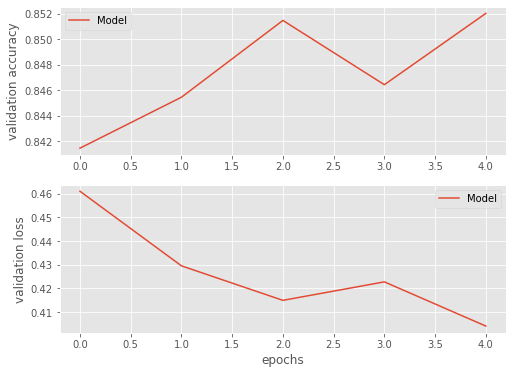

In [89]:
# Plot the accuracy
fig, (ax1, ax2) = plt.subplots(2, figsize=(8, 6))

val_acc = history_callback.history['val_acc']
val_loss = history_callback.history['val_loss']
ax1.plot(val_acc, label="Model")
ax2.plot(val_loss, label="Model")
    
ax1.set_ylabel('validation accuracy')
ax2.set_ylabel('validation loss')
ax2.set_xlabel('epochs')
ax1.legend()
ax2.legend()
plt.show()

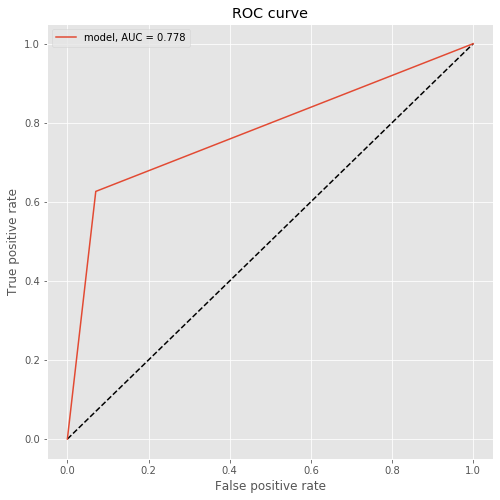

In [46]:
# Plot the ROC
plt.figure(figsize=(8, 8))
plt.plot([0, 1], [0, 1], 'k--')
    
Y_pred = model.predict(X_test)

real = np.argmax(Y_test, axis=1)
pred = np.argmax(Y_pred, axis=1)

fpr, tpr, threshold = roc_curve(real, pred)

plt.plot(fpr, tpr, label='{}, AUC = {:.3f}'.format("model", auc(fpr, tpr)))
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.title('ROC curve')
plt.legend();

In [47]:
real = np.array(real).reshape(6513)
confusion = pd.crosstab(real, pred)
confusion

col_0,0,1
row_0,,
0,4596,346
1,587,984


In [17]:
# Function to output innvestigate's LRP "Alphabeta value": 
# (for other options, see 
# https://github.com/albermax/innvestigate/blob/accbb99d0da2eb47f22e3d04563c8964e2b1ad90/innvestigate/analyzer/relevance_based/relevance_analyzer.py)
# lines 36-65

def deeptaylor (instance, dataframe):
    # Stripping the softmax activation from the model
    model_wo_sm = iutils.keras.graph.model_wo_softmax(model)

    # Creating an analyzer
    #gradient_analyzer = innvestigate.create_analyzer("lrp.alpha_2_beta_1", model_wo_sm)
    analyzer = innvestigate.create_analyzer("deep_taylor", model_wo_sm)

    # Applying the analyzer (reshape the instance for the LRP function)
    analysis = analyzer.analyze(np.expand_dims(dataframe[instance], axis=0))
    lst = []
    x = np.reshape (analysis,(108,))
    for i in range (len(x)):
        lst.append(x[i])
    return lst

In [18]:
# Choose an instance to test:
example = 74
example = X_train[example]

model_wo_sm = iutils.keras.graph.model_wo_softmax(model)

# Creating an analyzer
gradient_analyzer = innvestigate.create_analyzer("deep_taylor", model_wo_sm)

# Applying the analyzer
analysis = gradient_analyzer.analyze(np.expand_dims(example, axis=0))

# print (analysis)

In [19]:
col1 = []
for i in range(100):
    col1.append("attr {}".format(i))

columns = col1 + categorical

In [20]:
# Create and save two dataframes (train and test) containing Alphabeta LRP information obtained from the 2D CNN:
def create_lrp_dataframe(train_df, train_label):
    df = pd.DataFrame(columns=columns)
    for i in range(len(train_df)):
        df.loc[i] = deeptaylor(i, train_df)

    lst = []
    for i in train_label:
        lst.append (i.argmax(axis = 0))
    lst = pd.Series (lst)
    df['target'] =  lst
    
    return df

In [ ]:
# Save the LRP dataframes as pickle objects
adult_train_LRP = create_lrp_dataframe(X_train, Y_train)
adult_test_LRP = create_lrp_dataframe(X_test, Y_test)

adult_train_LRP.to_pickle("adult_train_LRP_pickle.pkl")
adult_test_LRP.to_pickle("adult_test_LRP_pickle.pkl")

In [96]:
def func(var):
    model_wo_sm = iutils.keras.graph.model_wo_softmax(model)
    # Creating an analyzer
    gradient_analyzer = innvestigate.create_analyzer("deep_taylor", model_wo_sm)
    # Applying the analyzer
    analysis = gradient_analyzer.analyze(np.expand_dims(var, axis=0))
    result = analysis.reshape(108)
    result = result.tolist()
    result = str(result)
    result = result.replace('[','').replace('[','')
    return result

In [ ]:
with open('adult_test_LRP', 'w+') as file:
    for i in X_test:
        file.write(func(i) + '\n')

In [100]:
df = pd.read_csv('test_file',\
                 names = columns,  sep=",\s")

In [ ]:
df.head()